# 3. Coordinate Systems and Axes

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.pylab as pylab
import calendar

## Cartesian coordinates

Figure 3-1. Standard Cartesian coordinate system.The horizontal axis is conventionally called x and the vertical axis y.The two axes form a grid with equidistant spacing. Here, both the x and y grid lines are seperated by units of one.


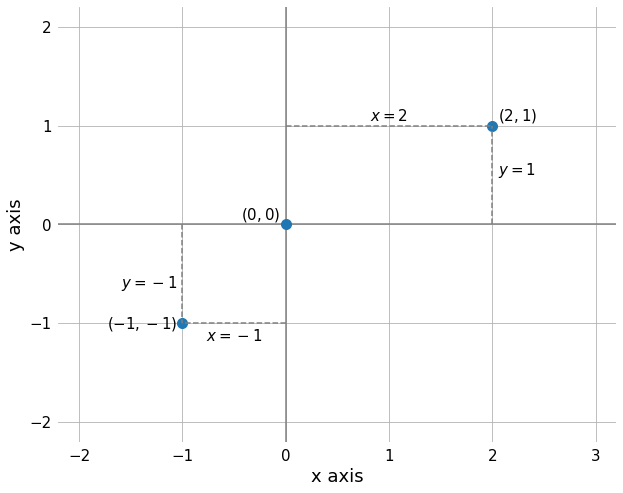

In [60]:
params = {'axes.labelsize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          }
text_size = 15

pylab.rcParams.update(params)

ax = plt.figure(figsize=(10,8)).gca()

plt.plot([-2.2,3.2],[0,0], '-', color='gray')
plt.plot([0,0], [-2.2,2.2], '-', color='gray')
plt.plot([0,2,-1], [0,1,-1], 'o', markersize=10)
plt.text(2.05, 1.05, '$(2,1)$', fontsize=text_size)
plt.text(-0.05, 0.05, '$(0,0)$', fontsize=text_size, ha='right')
plt.text(-1.05, -1.05, '$(-1,-1)$', fontsize=text_size, ha='right')

plt.plot([0,2], [1,1], '--', color='gray')
plt.text(1, 1.05, '$x=2$', fontsize=text_size, ha='center')
plt.plot([2,2],[0,1], '--', color='gray')
plt.text(2.05, 0.5, '$y=1$', fontsize=text_size)

plt.plot([0,-1], [-1,-1], '--', color='gray')
plt.text(-0.5, -1.05, '$x=-1$', fontsize=text_size, va='top', ha='center')
plt.plot([-1,-1],[0,-1], '--', color='gray')
plt.text(-1.05, -0.5, '$y=-1$', fontsize=text_size, va='top', ha='right')

plt.xlim(-2.2,3.2)
plt.ylim(-2.2,2.2)
plt.grid(True)

plt.xlabel('x axis')
plt.ylabel('y axis')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# Set borders off: https://stackoverflow.com/a/28720127/11524628
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
print('Figure 3-1. Standard Cartesian coordinate system.' +  
      'The horizontal axis is conventionally called x and the vertical axis y.' + 
      'The two axes form a grid with equidistant spacing. Here, both the x and y grid lines are seperated by units of one.')

In [158]:
# Load data
df = pd.read_csv("../data/resources/ncdc_normals.tsv",sep="\t")
df['location'] = df['station_id'].map({
    "USW00014819": 'Chicago',
    "USW00093107": 'San Francisco',
    "USW00012918": 'Houston',
    "USC00042319": 'Death Valley',
})
df.dropna(inplace=True)
df.sort_values(by=["month", "day"],inplace=True)
df = df[['month', 'day', 'location', 'station_id', 'temperature']]
df.reset_index(drop=True,inplace=True)
df['temperature'] = df['temperature'].astype(int)
houston = df[df['location']=='Houston']

# Create Houston temparature df
houston_temp = pd.DataFrame(houston.groupby('month')['temperature'].mean())
houston_temp.reset_index(inplace=True)
houston_temp['month'] = houston_temp['month'].map(lambda x: calendar.month_abbr[x])
houston_temp.loc[12, :] = ['Jan', houston_temp.loc[0, 'temperature']]
houston_temp

,month,temperature
0,Jan,53.419355
1,Feb,56.931034
2,Mar,62.935484
3,Apr,69.400000
4,May,76.580645
5,Jun,81.566667
6,Jul,83.354839
7,Aug,83.774194
8,Sep,79.600000
9,Oct,71.709677


Figure 3-2. Daily temperature normals for Houston, TX. Temperature is mpped to the y axis and day of the year to the x axis. Parts (a), (b), and (c) show the same figure in different aspect ratios.


/home/hnguyent/miniconda3/envs/dataviz/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


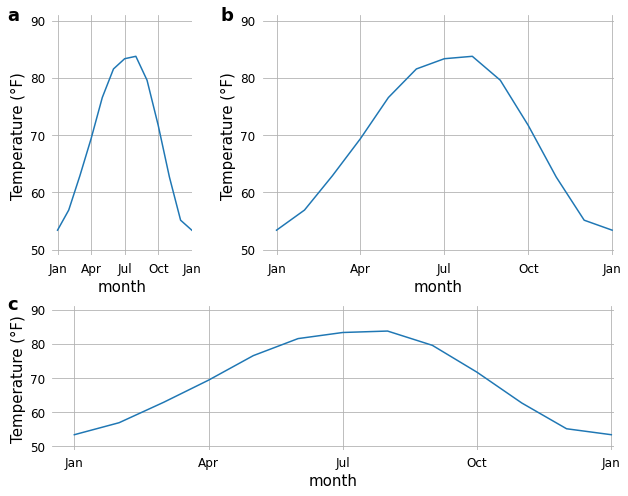

In [155]:
params = {'axes.labelsize': 15,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          }

pylab.rcParams.update(params)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
spec = fig.add_gridspec(nrows=5, ncols=3, left=0.05, right=0.7, hspace=1.1, wspace=0.5)

ax0 = fig.add_subplot(spec[0:3, 0])
ax0.text(-4.5, 90, 'a', fontsize=18, weight='bold')
ax1 = fig.add_subplot(spec[0:3, 1:])
ax1.text(-2, 90, 'b', fontsize=18, weight='bold')
ax2 = fig.add_subplot(spec[3:, :])
ax2.text(-1.5, 90, 'c', fontsize=18, weight='bold')

axes = [ax0, ax1, ax2]

for ax in axes:
    ax.plot(houston_temp.index, houston_temp['temperature'], '-')
    ax.set_ylabel('Temperature (°F)')
    ax.set_xlabel('month')
    ax.grid(True)
    
    ax.set_xlim(-0.5, 12.05)
    ax.set_xticks(np.arange(0, 13, 3))
    ax.set_xticklabels(['Jan', 'Apr', 'Jul', 'Oct', 'Jan'])
    ax.set_ylim([49, 91])
    ax.set_yticks(np.arange(50, 91, 10))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
    
print('Figure 3-2. Daily temperature normals for Houston, TX.' +
      ' Temperature is mpped to the y axis and day of the year to the x axis.' + 
      ' Parts (a), (b), and (c) show the same figure in different aspect ratios.')

In [235]:
# Houston against San Francisco
houston_sanfranc = df[df.location.isin(['Houston', 'San Francisco'])]
houston_vs_sanfranc = houston_sanfranc.groupby(['month', 'location'])['temperature'].mean().unstack()
houston_vs_sanfranc.loc[13,:] = houston_vs_sanfranc.loc[1,:]
houston_vs_sanfranc

location,Houston,San Francisco
month,,
1,53.419355,55.483871
2,56.931034,56.000000
3,62.935484,56.967742
4,69.400000,59.433333
5,76.580645,62.774194
6,81.566667,66.100000
7,83.354839,70.580645
8,83.774194,72.000000
9,79.600000,70.333333


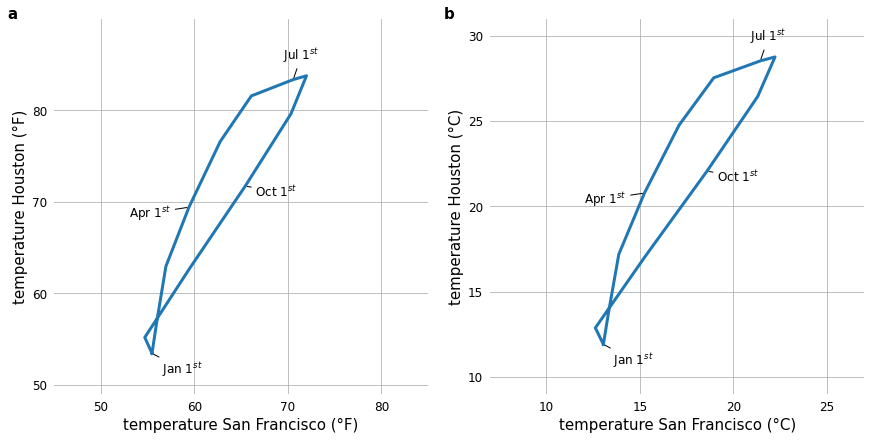

In [274]:
linewidth = 3
txt_size=12

fig = plt.figure(figsize=(12, 6), constrained_layout=True)
spec = fig.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.7)

ax0 = fig.add_subplot(spec[0, 0])
ax0.plot(houston_vs_sanfranc['San Francisco'].to_list(), houston_vs_sanfranc['Houston'].to_list(), '-', linewidth=linewidth)
ax0.set_ylabel('temperature Houston (°F)')
ax0.set_xlabel('temperature San Francisco (°F)')
ax0.set_ylim([49, 90])
ax0.set_yticks(np.arange(50, 81, 10))
ax0.set_xlim([45, 85])
ax0.set_xticks(np.arange(50, 81, 10))
ax0.text(40, 90, 'a', fontsize=15, weight='bold')

ax1 = fig.add_subplot(spec[0, 1])
ax1.plot((houston_vs_sanfranc['San Francisco'] - 32)/1.8, 
         (houston_vs_sanfranc['Houston'] - 32)/1.8, 
         '-', linewidth=linewidth)
ax1.set_ylabel('temperature Houston (°C)')
ax1.set_xlabel('temperature San Francisco (°C)')
ax1.set_ylim([9, 31])
ax1.set_yticks(np.arange(10,31,5))
ax1.set_xlim([7, 27])
ax1.set_xticks(np.arange(10,26,5))
ax1.text(4.5, 31, 'b', fontsize=15, weight='bold')

# Annotations
idice = [1, 4, 7, 10]
texts = ['Jan $1^{st}$', 'Apr $1^{st}$', 'Jul $1^{st}$', 'Oct $1^{st}$']
xytexts = [(10, -20), (-60, -10), (-10, 20), (10, -10)]

for idx, txt, xytext in zip(idice, texts, xytexts):
    ax0.annotate(txt, xy=(houston_vs_sanfranc['San Francisco'][idx], houston_vs_sanfranc['Houston'][idx]), 
                 xytext=xytext, textcoords='offset points', 
                 arrowprops=dict(arrowstyle="-"),
                 fontsize=txt_size)
    
    ax1.annotate(txt, xy=((houston_vs_sanfranc['San Francisco'][idx]-32)/1.8, (houston_vs_sanfranc['Houston'][idx]-32)/1.8), 
                 xytext=xytext,
                 arrowprops=dict(arrowstyle="-"),
                 textcoords='offset points', fontsize=txt_size)

axes = [ax0, ax1]

for ax in axes:
    ax.grid(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)

Figure 3-3. Daily temperature normals for Houston, TX, plotted versus the respective temperature normals of San Diego, CA. The first days of the months January, April, July, and October are highlighted to provide a temporal reference.